In [4]:
import pandas as pd
import scipy
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
import seaborn as sns

In [5]:
polarFile = '/Users/adgiridhar/Documents/Github/Datasets/Product Experiments/TOHR Feasibility/Pull_Force/Peter_90deg/Polar_bad_data/Polar.csv'
polarDf = pd.read_csv(polarFile)
polarDf

Name         Sport        Date    Start time       Duration  \
0     Chris  Ross  OTHER_INDOOR  22-03-2018      10:48:26       00:22:49   
1     Sample rate          Time    HR (bpm)  Speed (km/h)  Pace (min/km)   
2               1      00:00:00          92           NaN            NaN   
3             NaN      00:00:01          96           NaN            NaN   
4             NaN      00:00:02          97           NaN            NaN   
5             NaN      00:00:03          96           NaN            NaN   
6             NaN      00:00:04          96           NaN            NaN   
7             NaN      00:00:05          96           NaN            NaN   
8             NaN      00:00:06          91           NaN            NaN   
9             NaN      00:00:07          90           NaN            NaN   
10            NaN      00:00:08          90           NaN            NaN   
11            NaN      00:00:09          90           NaN            NaN   
12            NaN      00:00:10          91           NaN            NaN   
13            NaN      00:00:11          92           NaN            NaN   
14            NaN      00:00:12          94           NaN            NaN   
15            NaN      00:00:13          95           NaN            NaN   
16            NaN      00:00:14          95           NaN            NaN   
17            NaN      00:00:15          94           NaN            NaN   
18            NaN      00:00:16          93           NaN            NaN   
19            NaN      00:00:17          91           NaN            NaN   
20            NaN      00:00:18          90           NaN            NaN   
21            NaN      00:00:19          90           NaN            NaN   
22            NaN      00:00:20          91           NaN            NaN   
23            NaN      00:00:21          92           NaN            NaN   
24            NaN      00:00:22          93           NaN            NaN   
25            NaN      00:00:23          94           NaN            NaN   
26            NaN      00:00:24          94           NaN            NaN   
27            NaN      00:00:25          92           NaN            NaN   
28            NaN      00:00:26          92           NaN            NaN   
29            NaN      00:00:27          92           NaN            NaN   
...           ...           ...         ...           ...            ...   
1343          NaN      00:22:21          90           NaN            NaN   
1344          NaN      00:22:22          90           NaN            NaN   
1345          NaN      00:22:23          90           NaN            NaN   
1346          NaN      00:22:24          90           NaN            NaN   
1347          NaN      00:22:25          90           NaN            NaN   
1348          NaN      00:22:26          88           NaN            NaN   
1349          NaN      00:22:27          87           NaN            NaN   
1350          NaN      00:22:28          88           NaN            NaN   
1351          NaN      00:22:29          88           NaN            NaN   
1352          NaN      00:22:30          89           NaN            NaN   
1353          NaN      00:22:31          89           NaN            NaN   
1354          NaN      00:22:32          89           NaN            NaN   
1355          NaN      00:22:33          90           NaN            NaN   
1356          NaN      00:22:34          90           NaN            NaN   
1357          NaN      00:22:35          89           NaN            NaN   
1358          NaN      00:22:36          88           NaN            NaN   
1359          NaN      00:22:37          88           NaN            NaN   
1360          NaN      00:22:38          86           NaN            NaN   
1361          NaN      00:22:39          85           NaN            NaN   
1362          NaN      00:22:40          85           NaN            NaN   
1363          NaN      00:22:41          87           NaN    

In [6]:
polarDf.iloc[0,3]

'10:48:26'

Pull_Force / Peter_90deg / pos4 / 10lbs 

line  0 = { ['Notes', ':'] }
line  1 = { [] }
line  2 = { [] }
line  3 = { ['3/22/2018', '11:20:19', 'AM'] }
line  4 = { ['Volts'] }
line  5 = { ['Ch', ':', 'LED', '2', 'Ch', ':', 'LED', '1', 'Ch', ':', 'LED', '2', '-', 'LED3'] }
line  6 = { ['-356.013680E-3', '-68.622780E-3', '124.200439E-3'] }
line  7 = { ['-356.978989E-3', '-68.134689E-3', '124.011612E-3'] }
1913


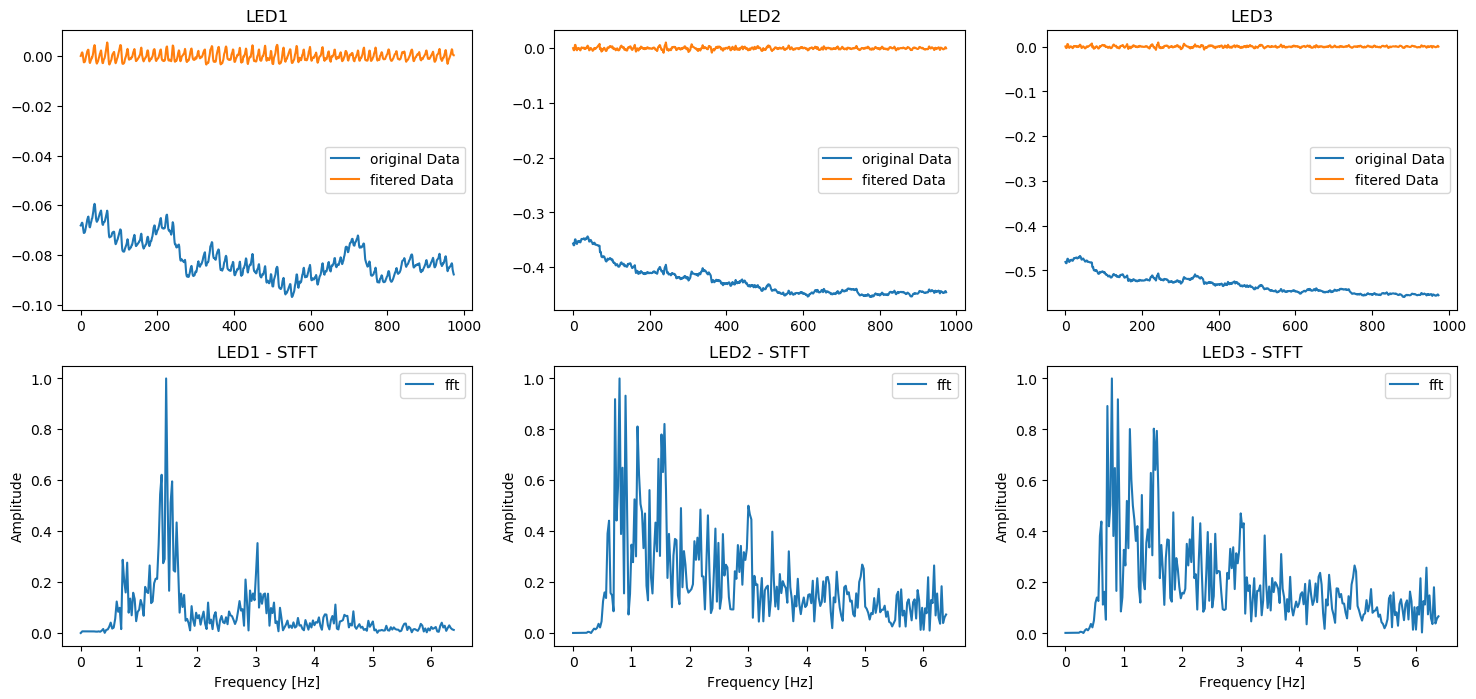

Pull_Force / Peter_90deg / pos4 / 25lbs 



FileNotFoundError: [Errno 2] No such file or directory: '/Users/adgiridhar/Documents/Github/Datasets/Product Experiments/TOHR Feasibility/Pull_Force/Peter_90deg/pos4/25lbs/Volts.xls'

In [493]:
type_ = 'Pull_Force'
subject_ = 'Peter_90deg'#'Kian_90deg'
Pos_ = ['pos1','pos2','pos3','pos4']#,'pos4']#['pos1','pos2']#,
Trials_ = ['120bpm_X','120bpm_Y','120bpm_Z','180bpm_X','180bpm_Y','180bpm_Z']
#Trials_ = ['10lbs','25lbs','50lbs']
for Pos in Pos_:
    for Trial in Trials_:
        #motivFile = '/Users/adgiridhar/Documents/Github/Datasets/Product Experiments/TOHR Feasibility/'+type_+'/'+subject_+'/'+Pos+'/Volts.xls'  
        motivFile = '/Users/adgiridhar/Documents/Github/Datasets/Product Experiments/TOHR Feasibility/'+type_+'/'+subject_+'/'+Pos+'/'+Trial+'/Volts.xls'  
        print(type_,'/',subject_,'/',Pos,'/',Trial,'\n')
        with open(motivFile) as f:
            lis=[line.split() for line in f]        # create a list of lists
            for i,x in enumerate(lis[:8]):              #print the list items 
                print('line ',i,'= {',x,'}')
        
        offset = pd.to_datetime(lis[3][0]+' '+lis[3][1]+' '+lis[3][2]) - pd.to_datetime(lis[3][0]+' '+polarDf.iloc[0,3])
        offset = int(offset.total_seconds())
        print(offset)
        trialT = 60 #seconds
        
        if len(lis[6:])==3:
            LED1 = [float(x[1]) for x in lis[6:]]
            LED2 = [float(x[0]) for x in lis[6:]]
            LED3 = [float(x[0])-float(x[2]) for x in lis[6:]]
        else:
            LED1 = [float(x[1]) for x in lis[7:]]
            LED2 = [float(x[0]) for x in lis[7:]]
            LED3 = [float(x[0])-float(x[2]) for x in lis[7:]]
        Fs = 25
        Nyq = Fs*0.5
        cutoff = 1/20 #0.5/Nyq
        b, a = signal.butter(4, cutoff, btype='high', analog=False)
        LED1_filt = signal.filtfilt(b, a, LED1)
        LED2_filt = signal.filtfilt(b, a, LED2)
        LED3_filt = signal.filtfilt(b, a, LED3)
        
        #LED1_filt = LED1_filt - LED3_filt
        #LED2_filt = LED2_filt - LED3_filt
        
        '''
        bpm = [int(x) for x in polarDf.iloc[3+offset:3+offset+trialT,2].values.tolist()]
        print(np.mean(bpm))
        bpmFreq = [x/60 for x in bpm]
        plt.figure()
        ax2 = sns.distplot(bpmFreq)
        data_x2, data_y2 = ax2.lines[0].get_data()
        plt.show()
        '''
        
        plt.figure(figsize=[18,8])
        plt.subplot(231)
        plt.plot(range(len(LED1)),LED1,label='original Data')
        plt.plot(range(len(LED1)),LED1_filt,label='fitered Data')
        plt.title('LED1')
        plt.legend()
        #plt.show()

        #plt.figure()
        plt.subplot(232)
        plt.plot(range(len(LED2)),LED2,label='original Data')
        plt.plot(range(len(LED2)),LED2_filt,label='fitered Data')
        plt.title('LED2')
        plt.legend()
        #plt.show()

        #plt.figure()
        plt.subplot(233)
        plt.plot(range(len(LED3)),LED3,label='original Data')
        plt.plot(range(len(LED3)),LED3_filt,label='fitered Data')
        plt.title('LED3')
        plt.legend()
        #plt.show()
        
        fft_range = 250
        Zxx = np.abs(np.fft.fft(LED1_filt-np.mean(LED1_filt)))#, 25, nperseg=1000)
        f = np.fft.fftfreq(len(LED1_filt), d = 1/25)
        Zxx = Zxx/max(Zxx[:fft_range])

        #plt.figure(figsize=[20,5])
        plt.subplot(234)
        plt.plot(f[:fft_range],Zxx[:fft_range],label='fft')
        #plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
        #plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
        plt.title('LED1 - STFT')
        plt.ylabel('Amplitude')
        plt.xlabel('Frequency [Hz]')
        plt.legend()
        #plt.show()

        Zxx = np.abs(np.fft.fft(LED2_filt))#, 25, nperseg=1000)
        f = np.fft.fftfreq(len(LED2_filt), d = 1/25)
        Zxx = Zxx/max(Zxx[:fft_range])

        #plt.figure()
        plt.subplot(235)
        plt.plot(f[:fft_range],Zxx[:fft_range],label='fft')
        #plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
        #plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
        plt.title('LED2 - STFT')
        plt.ylabel('Amplitude')
        plt.xlabel('Frequency [Hz]')
        plt.legend()
        #plt.show()

        Zxx = np.abs(np.fft.fft(LED3_filt))#, 25, nperseg=1000)
        f = np.fft.fftfreq(len(LED3_filt), d = 1/25)
        Zxx = Zxx/max(Zxx[:fft_range])

        #plt.figure()
        plt.subplot(236)
        plt.plot(f[:fft_range],Zxx[:fft_range],label='fft')
        #plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
        #plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
        plt.title('LED3 - STFT')
        plt.ylabel('Amplitude')
        plt.xlabel('Frequency [Hz]')
        plt.legend()
        plt.show()

In [334]:
motivFile = '/Users/adgiridhar/Documents/Github/Datasets/Product Experiments/TOHR Feasibility/Controlled Movement/Kian_90deg/'+Pos+'/'+Trial+'/Volts.xls'  
print('Kian_90deg/',Pos_,'/',Trial,'\n')
with open(motivFile) as f:
    lis=[line.split() for line in f]        # create a list of lists
    for i,x in enumerate(lis):              #print the list items 
        print('line ',i,'= {',x,'}')

Kian_90deg/ Pos1 / 120bpm_Z 

line  0 = { ['Notes', ':'] }
line  1 = { [] }
line  2 = { [] }
line  3 = { ['3/13/2018', '2:33:18', 'PM'] }
line  4 = { ['Volts'] }
line  5 = { ['Ch', ':', 'LED', '2', 'Ch', ':', 'LED', '1', 'Ch', ':', 'LED', '2', '-', 'LED3'] }
line  6 = { [] }
line  7 = { ['-720.356941E-3', '-707.627678E-3', '-147.510338E-3'] }
line  8 = { ['-728.366089E-3', '-716.982079E-3', '-147.594452E-3'] }
line  9 = { ['-747.164726E-3', '-727.231407E-3', '-146.965027E-3'] }
line  10 = { ['-770.722961E-3', '-743.251419E-3', '-145.075607E-3'] }
line  11 = { ['-784.993172E-3', '-756.385803E-3', '-143.480873E-3'] }
line  12 = { ['-787.577820E-3', '-760.340881E-3', '-143.059731E-3'] }
line  13 = { ['-785.988808E-3', '-761.884689E-3', '-143.145561E-3'] }
line  14 = { ['-782.610512E-3', '-758.045197E-3', '-143.169022E-3'] }
line  15 = { ['-774.502945E-3', '-750.056648E-3', '-144.097137E-3'] }
line  16 = { ['-765.828896E-3', '-743.043137E-3', '-146.666908E-3'] }
line  17 = { ['-753.056145E

line  628 = { ['-662.500191E-3', '-649.409866E-3', '-133.592033E-3'] }
line  629 = { ['-655.415154E-3', '-636.575317E-3', '-134.543037E-3'] }
line  630 = { ['-660.941505E-3', '-638.152885E-3', '-134.112740E-3'] }
line  631 = { ['-666.905594E-3', '-641.005898E-3', '-134.051514E-3'] }
line  632 = { ['-670.450401E-3', '-642.477608E-3', '-133.953667E-3'] }
line  633 = { ['-670.666695E-3', '-639.178848E-3', '-133.871841E-3'] }
line  634 = { ['-666.866112E-3', '-633.003044E-3', '-134.057808E-3'] }
line  635 = { ['-661.010742E-3', '-626.139450E-3', '-134.787369E-3'] }
line  636 = { ['-657.570648E-3', '-624.335289E-3', '-135.682297E-3'] }
line  637 = { ['-655.225182E-3', '-626.731110E-3', '-136.510849E-3'] }
line  638 = { ['-648.117256E-3', '-625.167847E-3', '-137.781143E-3'] }
line  639 = { ['-639.826012E-3', '-621.574974E-3', '-138.789368E-3'] }
line  640 = { ['-637.756348E-3', '-623.011208E-3', '-139.043427E-3'] }
line  641 = { ['-638.711357E-3', '-625.858498E-3', '-137.996864E-3'] }
line  

In [322]:
offset = pd.to_datetime(lis[3][0]+' '+lis[3][1]+' '+lis[3][2]) - pd.to_datetime(lis[3][0]+' '+polarDf.iloc[0,3])
offset = int(offset.total_seconds())
print(offset)
trialT = 60 #seconds

153


In [323]:
LED1 = [float(x[0]) for x in lis[6:]]
LED2 = [float(x[1]) for x in lis[6:]]
LED3 = [float(x[2]) for x in lis[6:]]

Fs = 25
Nyq = Fs*0.5
cutoff = 0.5/Nyq
b, a = signal.butter(4, 1/20, btype='high', analog=False)
LED1_filt = signal.filtfilt(b, a, LED1)
LED2_filt = signal.filtfilt(b, a, LED2)
LED3_filt = signal.filtfilt(b, a, LED3)

84.4


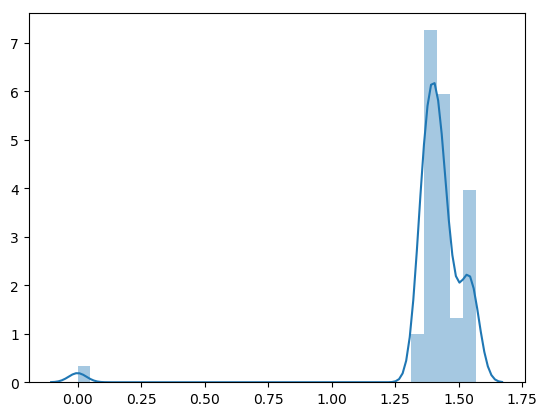

In [324]:
bpm = [int(x) for x in polarDf.iloc[3+offset:3+offset+trialT,2].values.tolist()]
print(np.mean(bpm))
bpmFreq = [x/60 for x in bpm]
plt.figure()
ax2 = sns.distplot(bpmFreq)
data_x2, data_y2 = ax2.lines[0].get_data()
plt.show()


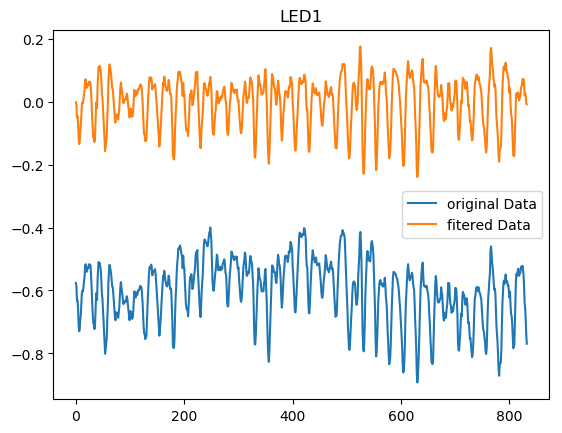

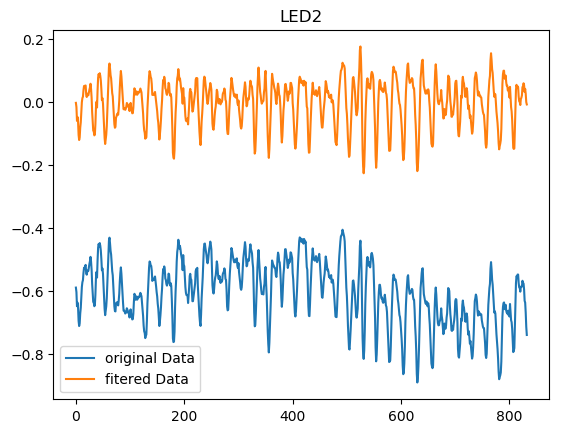

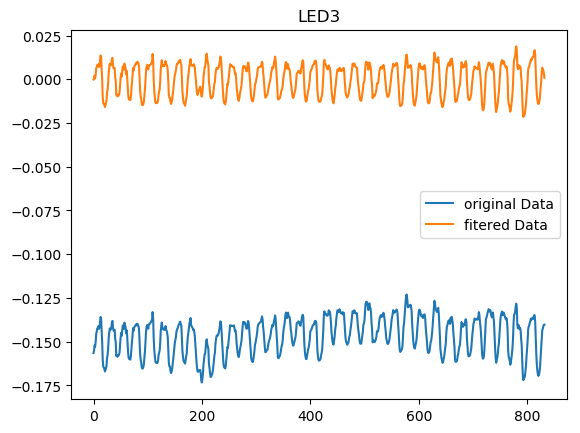

In [325]:
plt.figure()
plt.plot(range(len(LED1)),LED1,label='original Data')
plt.plot(range(len(LED1)),LED1_filt,label='fitered Data')
plt.title('LED1')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(len(LED2)),LED2,label='original Data')
plt.plot(range(len(LED2)),LED2_filt,label='fitered Data')
plt.title('LED2')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(len(LED3)),LED3,label='original Data')
plt.plot(range(len(LED3)),LED3_filt,label='fitered Data')
plt.title('LED3')
plt.legend()
plt.show()

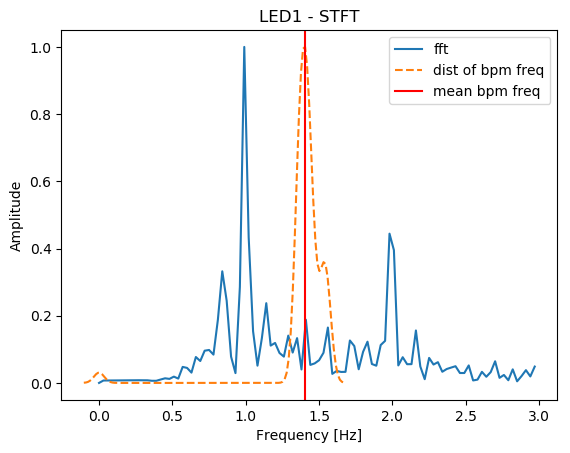

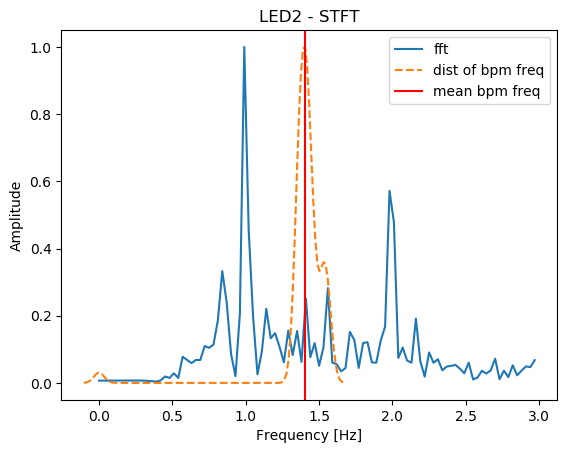

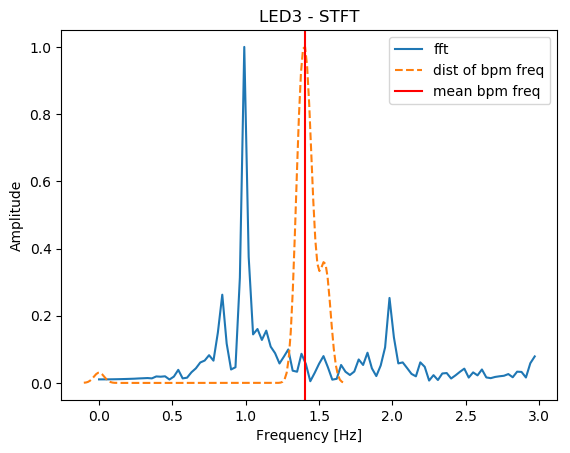

In [326]:
Zxx = np.abs(np.fft.fft(LED1_filt-np.mean(LED1_filt)))#, 25, nperseg=1000)
f = np.fft.fftfreq(len(LED1_filt), d = 1/25)
Zxx = Zxx/max(Zxx)

plt.figure()
plt.plot(f[:100],Zxx[:100],label='fft')
plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
plt.title('LED1 - STFT')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()

Zxx = np.abs(np.fft.fft(LED2_filt))#, 25, nperseg=1000)
f = np.fft.fftfreq(len(LED2_filt), d = 1/25)
Zxx = Zxx/max(Zxx)

plt.figure()
plt.plot(f[:100],Zxx[:100],label='fft')
plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
plt.title('LED2 - STFT')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()

Zxx = np.abs(np.fft.fft(LED3_filt))#, 25, nperseg=1000)
f = np.fft.fftfreq(len(LED3_filt), d = 1/25)
Zxx = Zxx/max(Zxx)

plt.figure()
plt.plot(f[:100],Zxx[:100],label='fft')
plt.plot(data_x2,data_y2/max(data_y2),label='dist of bpm freq',linestyle='--')
plt.axvline(np.mean(bpmFreq),color='r',label='mean bpm freq')
plt.title('LED3 - STFT')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()

In [327]:
57/60
data_x2, data_y2 = ax2.lines[2].get_data()
peaks2 = signal.find_peaks_cwt(data_y2,np.arange(1,20))
plt.axvline(data_x2[peaks2[np.argmax(data_y2[peaks2-1])]],color='#EA4500',linestyle='--')


IndexError: list index out of range

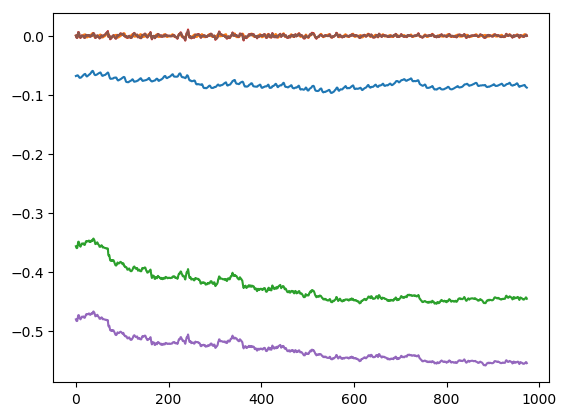

In [496]:
plt.figure()
plt.plot(LED1)
plt.plot(LED1_filt)
plt.plot(LED2)
plt.plot(LED2_filt)
plt.plot(LED3)
plt.plot(LED3_filt)
plt.show()

In [2]:
a = '000'
b = '0 0'
def a_(c):
    for x in range(c):
        print('0')
for x in range()
for i in range(5):
    if i%2 == 0:
        print(a)
    else:
        print(b)


000
0 0
000
0 0
000
